# Свободная частица на гладкой поверхности без трения
Уравнение поверхности: $\Phi(x,y,z)=0$.  
$\quad\dfrac{d\Phi}{dt}=0, \\
\quad\Phi_x\dot{x}+\Phi_y\dot{y}+\Phi_z\dot{z}=0.$  
$\nabla\Phi =
\begin{pmatrix}
\Phi_x \\
\Phi_y \\
\Phi_z
\end{pmatrix},
\ \vec{r} = 
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix},
\quad \nabla\Phi^T\dot{\vec{r}}=0.$

Запишем уравнение движения в виде $\ddot{\vec{r}}=\lambda\nabla\Phi$: найдем $\lambda$ из
уравнения $\dfrac{d^2\Phi}{dt^2}=0$, подставив в него $\ddot{\vec{r}}$.  
$\quad\dot{x}\Phi_{xx}\dot{x}+\dot{x}\Phi_{xy}\dot{y}+\dot{x}\Phi_{xz}\dot{z}+\Phi_x\ddot{x}+\\
+\ \dot{y}\Phi_{yx}\dot{x}+\dot{y}\Phi_{yy}\dot{y}+\dot{y}\Phi_{yz}\dot{z}+\Phi_y\ddot{y}+\\
+\ \dot{z}\Phi_{zx}\dot{x}+\dot{z}\Phi_{zy}\dot{y}+\dot{z}\Phi_{zz}\dot{z}+\Phi_z\ddot{z}=0, \\  
\quad\dot{\vec{r}}\vphantom.^T \Phi_{\vec r\vec r} \dot{\vec{r}}+\nabla\Phi^T\ddot{\vec{r}}=0, 
\quad\quad\quad \ddot{\vec{r}}=\lambda\nabla\Phi, \\
\quad\lambda = -\dfrac{\dot{\vec{r}}\vphantom.^T\Phi_{\vec r\vec r}\dot{\vec{r}}}{\nabla\Phi^T\nabla\Phi}. $  
Окончательно получаем:
$
\quad
\begin{cases}
\ddot{\vec{r}}=-\dfrac{\dot{\vec{r}}\vphantom.^T\Phi_{\vec r\vec r}\dot{\vec{r}}}{(\nabla\Phi)^2}\nabla\Phi, \\
(\dot{\vec{r_0}},\nabla\Phi)=0.
\end{cases}
$  
Вектор $\dot{\vec{r_0}}$ можно представить в виде:$\ \dot{\vec{r_0}}= [\vec k\times\nabla\Phi]$, где $\vec k$ - произвольный вектор.

Рассмотрим в качестве поверхности $z=f(x,y)$.  
$
\quad\Phi(x,y,z)=z-f(x,y)=0, \\
\quad\nabla\Phi=\{-f_x,-f_y,1\}, \\
\quad\nabla\Phi^2=1+f_x^2+f_y^2, \\
\quad\Phi_{\vec r\vec r}=-
\begin{pmatrix}
f_{xx}& f_{xy}& 0\\
f_{yx}& f_{yy}& 0\\
0& 0& 0
\end{pmatrix}, \\
\begin{cases}
\ddot{x} = \dfrac{\dot{x}^2 f_{xx}+2\dot{x}\dot{y}f_{xy}+\dot{y}^2 f_{yy}}{1+f_x^2+f_y^2}(-f_x), \\
\ddot{y} = \dfrac{\dot{x}^2 f_{xx}+2\dot{x}\dot{y}f_{xy}+\dot{y}^2 f_{yy}}{1+f_x^2+f_y^2}(-f_y), \\
\ddot{z} = \dfrac{\dot{x}^2 f_{xx}+2\dot{x}\dot{y}f_{xy}+\dot{y}^2 f_{yy}}{1+f_x^2+f_y^2}.
\end{cases}
$

Возьмем $\ f(x,y)=he^{-\frac{x^2+y^2}{2\sigma^2}}$:  
$
\quad f_x = -\dfrac{x}{\sigma^2}f,\quad f_y = -\dfrac{y}{\sigma^2}f, \\
\quad f_{xx} = \left(\dfrac{x^2}{\sigma^4}-\dfrac{1}{\sigma^2}\right)f,
\quad f_{xy} = \dfrac{xy}{\sigma^4}f,
\quad f_{yy} = \left(\dfrac{y^2}{\sigma^4}-\dfrac{1}{\sigma^2}\right)f, \\
\quad\nabla\Phi=\left\{\dfrac{x}{\sigma^2}f,\ \dfrac{y}{\sigma^2}f,\ 1\right\}, \\
\vec{r_0}=\{x_0,\ y_0,\ z_0\},\quad \dot{\vec{r_0}}=\alpha[-\vec e_x,\nabla\Phi],\quad
\text{где}\ z_0=f(x_0,y_0).
$

In [1]:
h = 4.5
s = 1
f(x,y) = h*exp(-(x^2+y^2)/2s^2)
f_x(x,y) = -x/s^2*f(x,y)
f_y(x,y) = -y/s^2*f(x,y)
f_xx(x,y) = (x^2/s^4-1/s^2)*f(x,y)
f_xy(x,y) = x*y/s^4*f(x,y)
f_yy(x,y) = (y^2/s^4-1/s^2)*f(x,y)
grad(x,y) = [-f_x(x,y),-f_y(x,y),1]

grad (generic function with 1 method)

In [2]:
function geodesic(F,u,p,t)
    x,y,z,v_x,v_y,v_z = u
    F[1:3] = [v_x,v_y,v_z]
    F[6] = (v_x^2*f_xx(x,y)+2*v_x*v_y*f_xy(x,y)+v_y^2*f_yy(x,y))/(1+f_x(x,y)^2+f_y(x,y)^2)
    F[4] = F[6]*(-f_x(x,y))
    F[5] = F[6]*(-f_y(x,y))
end

geodesic (generic function with 1 method)

In [6]:
using DifferentialEquations
using LinearAlgebra

T = 10
lines = []
for n=0:10
    x_0, y_0 = 0.2*n, -3
    r_0 = [x_0, y_0, f(x_0,y_0)]
    v_0 = cross([-1,0,0],grad(x_0,y_0));
    prob = ODEProblem(geodesic, [r_0;v_0./norm(v_0)], (0.0,T))
    sol = solve(prob,Tsit5(),reltol=1e-12,abstol=1e-12)
    push!(lines,sol)
end

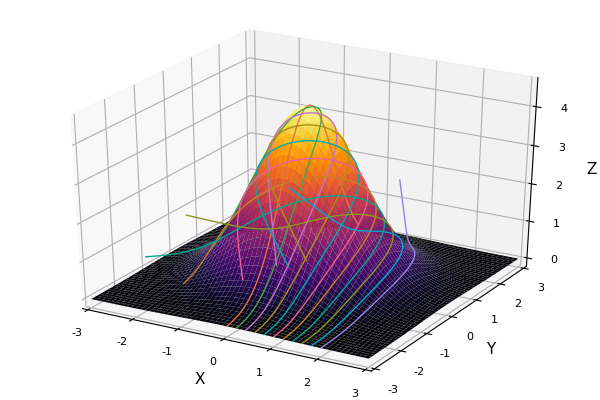

In [7]:
using Plots
pyplot()

x = -3:0.1:3
y = -3:0.1:3
z = reshape([f(a,b) for a in x for b in y],length(x),length(y))

plot(x,y,z,lt=:surface,leg=false,xlabel="X",ylabel="Y",zlabel="Z")
for line in lines
    plot!(line,vars=(1,2,3),xlim=(-3,3),ylim=(-3,3),lw=1)
end
plot!()

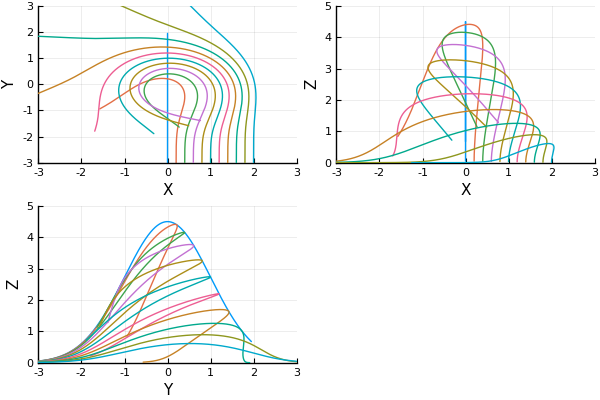

In [8]:
p1 = plot(xlabel="X",ylabel="Y",leg=false)
for line in lines
    plot!(line,vars=(1,2),xlim=(-3,3),ylim=(-3,3),lw=1)
end

p2 = plot(xlabel="X",ylabel="Z",leg=false)
for line in lines
    plot!(line,vars=(1,3),xlim=(-3,3),ylim=(0,5),lw=1)
end

p3 = plot(xlabel="Y",ylabel="Z",leg=false)
for line in lines
    plot!(line,vars=(2,3),xlim=(-3,3),ylim=(0,5),lw=1)
end

plot(p1, p2, p3)